# 一様磁場での挙動

In [73]:
import numpy as np
from scipy.integrate import RK45, solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [74]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.dpi"] = 150
plt.rcParams["image.cmap"] = "jet"

In [75]:
CHARGE = 1.0
MASS = 1.0


In [76]:
def calc_mfield_all(x, y, z):
	return np.ones_like(x)

def calc_mfield_onepoint(position):
	return np.array([0, 0, 1])

def eq_motion_RHS(t, velocity, position):
	m = MASS
	q = CHARGE
	mfield = calc_mfield_onepoint(position=position)
	f = np.cross(velocity, mfield)
	return f * q / m

def runge_kutta(f, t0, x0, v0, te, h):
    ts = np.arange(t0, te, h)
    xs = []
    vs = []
    x = x0
    v = v0
    for t in tqdm(ts):
        xs.append(x)
        vs.append(v)
        k1 = f(t, v, x)
        l1 = v

        k2 = f(t + h/2, v + h/2*k1, x + h/2*l1)
        l2 = v + h/2*k1

        k3 = f(t + h/2, v + h/2*k2, x + h/2*l2)
        l3 = v + h/2*k2

        k4 = f(t + h, v + h*k3, x + h*l3)
        l4 = v + h*k3
        
        v = v + (k1 + 2*k2 + 2*k3 + k4)/6*h
        x = x + (l1 + 2*l2 + 2*l3 + l4)/6*h

    return (ts, np.array(xs))

In [77]:
x_unique, y_unique = np.linspace(-5, 5, 501), np.linspace(-5, 5, 501)
xx, yy = np.meshgrid(x_unique, y_unique)

Text(0, 0.5, 'y')

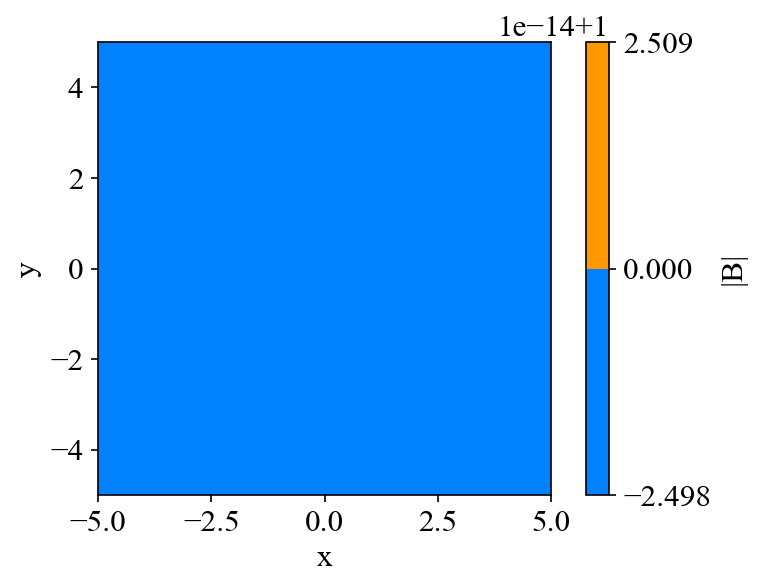

In [78]:
bb = calc_mfield_all(x=xx, y=yy, z=0)

fig = plt.figure(facecolor="white")
ax = fig.add_subplot(111)
ax.set_aspect("equal")

mappable = ax.contourf(xx, yy, bb)
plt.colorbar(mappable=mappable, label="|B|")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [79]:
init_position = np.array([1, 0, 0])
init_velocity = np.array([0, -1, 0])

rama_radius = MASS * 1 / (CHARGE * 1)
period = 2 * np.pi * rama_radius / 1
ts, positions = runge_kutta(f=eq_motion_RHS, t0=0, x0=init_position, v0=init_velocity, te=period, h=1e-3)

100%|██████████| 6284/6284 [00:01<00:00, 5187.36it/s]


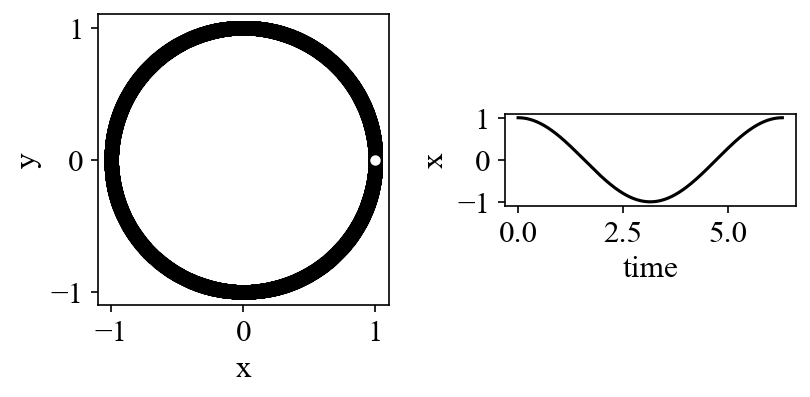

In [80]:
xs = positions[:, 0]
ys = positions[:, 1]

fig = plt.figure(facecolor="white")
plt.subplots_adjust(wspace=0.4, hspace=0.6)
ax1 = fig.add_subplot(121)
ax1.set_aspect("equal")

ax1.scatter(xs, ys, ec="black", fc="white")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2 = fig.add_subplot(122)
ax2.set_aspect("equal")
ax2.set_xlabel("time")
ax2.set_ylabel("x")
xs = ts
ys = positions[:, 0]
ax2.plot(xs, ys, color="black")


# 半径方向に勾配がある磁場

In [81]:
def calc_mfield_onepoint(position):
	r = np.linalg.norm(position[:2])
	return np.array([0, 0, np.exp(-r)])

(-2.0, 2.0)

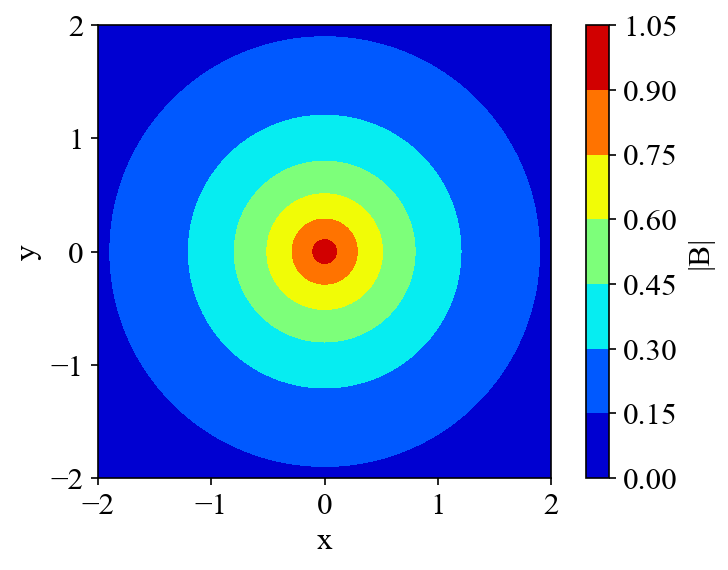

In [82]:
bb = np.zeros_like(xx)
for i in range(len(x_unique)):
	for j in range(len(y_unique)):
		position = np.array([x_unique[i], y_unique[j], 0])
		bb[i, j] = np.linalg.norm(calc_mfield_onepoint(position=position))


fig = plt.figure(facecolor="white")
ax = fig.add_subplot(111)
ax.set_aspect("equal")

mappable = ax.contourf(xx, yy, bb)
plt.colorbar(mappable=mappable, label="|B|")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-2, 2])
ax.set_xlim([-2, 2])

100%|██████████| 188496/188496 [00:44<00:00, 4275.80it/s]


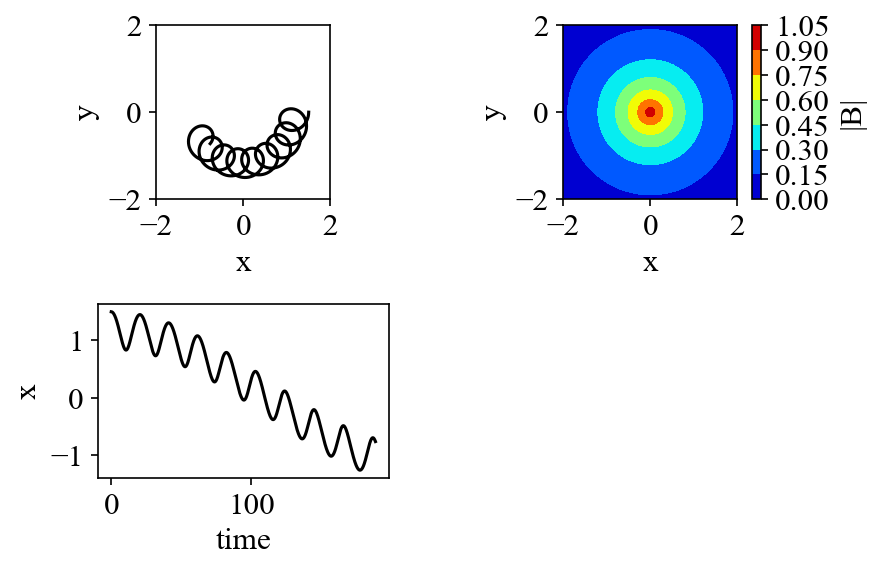

In [83]:
init_position = np.array([1.5, 0, 0])
init_velocity = np.array([0, -0.1, 0])

rama_radius = MASS * 1 / (CHARGE * 1)
period = 2 * np.pi * rama_radius / 1
ts, positions = runge_kutta(f=eq_motion_RHS, t0=0, x0=init_position, v0=init_velocity, te=period*30, h=1e-3)

xs = positions[:, 0]
ys = positions[:, 1]

fig = plt.figure(facecolor="white")
plt.subplots_adjust(wspace=0.4, hspace=0.6)
ax1 = fig.add_subplot(221)
ax1.set_aspect("equal")

ax1.plot(xs, ys, color="black")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])

ax2 = fig.add_subplot(222)
ax2.set_aspect("equal")
mappable = ax2.contourf(xx, yy, bb)
plt.colorbar(mappable=mappable, label="|B|")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_ylim([-2, 2])
ax2.set_xlim([-2, 2])

ax3 = fig.add_subplot(223)
ax3.set_xlabel("time")
ax3.set_ylabel("x")
xs = ts
ys = positions[:, 0]
ax3.plot(xs, ys, color="black")

## 磁場の強さを変えてみる

In [84]:
def calc_mfield_onepoint(position):
	r = np.linalg.norm(position[:2])
	return np.array([0, 0, np.exp(-r) * 2])

100%|██████████| 188496/188496 [00:43<00:00, 4307.98it/s]


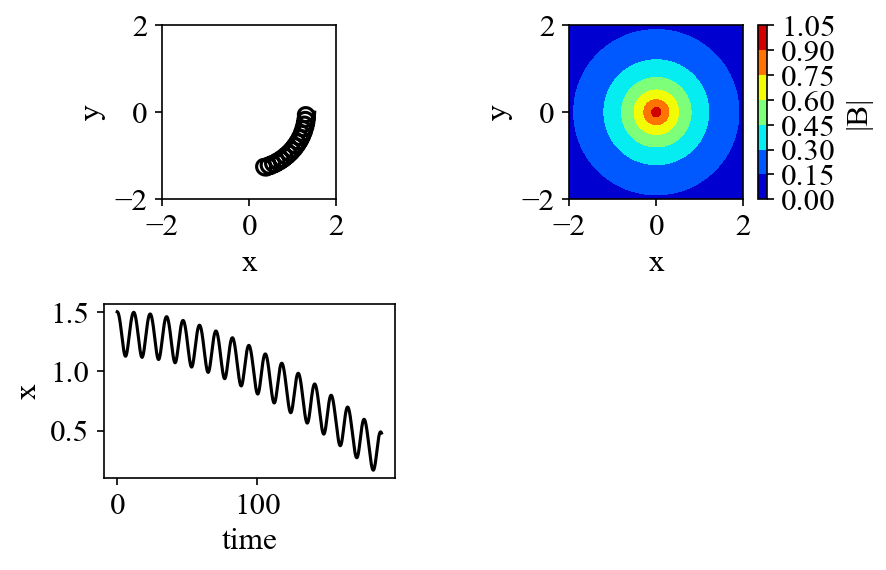

In [85]:
init_position = np.array([1.5, 0, 0])
init_velocity = np.array([0, -0.1, 0])

rama_radius = MASS * 1 / (CHARGE * 1)
period = 2 * np.pi * rama_radius / 1
ts, positions = runge_kutta(f=eq_motion_RHS, t0=0, x0=init_position, v0=init_velocity, te=period*30, h=1e-3)

xs = positions[:, 0]
ys = positions[:, 1]

fig = plt.figure(facecolor="white")
plt.subplots_adjust(wspace=0.4, hspace=0.6)
ax1 = fig.add_subplot(221)
ax1.set_aspect("equal")

ax1.plot(xs, ys, color="black")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])

ax2 = fig.add_subplot(222)
ax2.set_aspect("equal")
mappable = ax2.contourf(xx, yy, bb)
plt.colorbar(mappable=mappable, label="|B|")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_ylim([-2, 2])
ax2.set_xlim([-2, 2])

ax3 = fig.add_subplot(223)
ax3.set_xlabel("time")
ax3.set_ylabel("x")
xs = ts
ys = positions[:, 0]
ax3.plot(xs, ys, color="black")

# z軸に沿って強くなる磁場

In [86]:
x_unique, y_unique, z_unique = np.linspace(-5, 5, 501), np.linspace(-5, 5, 501), np.linspace(0, 4, 501)
xx, yy, zz = np.meshgrid(x_unique, y_unique, z_unique)

## こんな磁力線

Text(0, 0.5, 'density')

<Figure size 1500x1500 with 0 Axes>

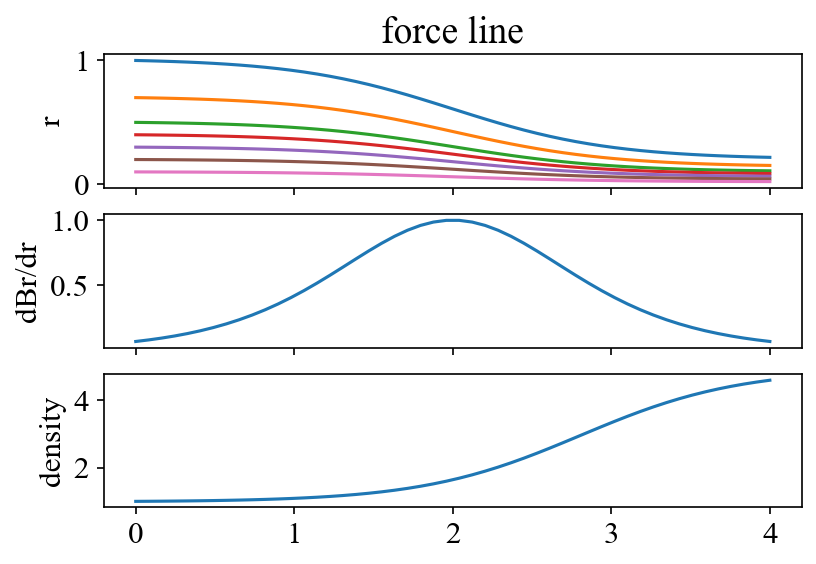

In [87]:
fig = plt.figure(facecolor="white", figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
ax_num = 3
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

xs = np.linspace(0, 4)
ys1 = (np.tanh(-xs + 2) + 1.5) / np.max(np.tanh(-xs+2) + 1.5)
ax1.plot(xs, ys1)
ax1.plot(xs, ys1*0.7)
ax1.plot(xs, ys1*0.5)
ax1.plot(xs, ys1*0.4)
ax1.plot(xs, ys1*0.3)
ax1.plot(xs, ys1*0.2)
ax1.plot(xs, ys1*0.1)
ax1.set_ylabel("r")
ax1.set_title("force line")


ys2 = np.cosh(-xs + 2)**(-2)
ax2.plot(xs, ys2)
ax2.set_ylabel("dBr/dr")

ys3 = 1 / ys1
ax3.plot(xs, ys3)
ax3.set_ylabel("density")




In [88]:
def force_line(xs):
	"""0 < x < 4""" 
	ys1 = (np.tanh(-xs + 2) + 1.5) / np.max(np.tanh(-xs+2) + 1.5)
	return ys1

def theta(xs):
	ys2 = np.cosh(-xs + 2)**(-2)
	return np.arctan(ys2)

def density(xs):
	return 1 / force_line(xs)

# def calc_mfield_onepoint(position):
# 	r = np.linalg.norm(position[:2])
# 	z = position[2]
# 	return np.array([0, 0, np.exp(-r)*(z)])

def calc_mfield_all(xx, yy, zz):
	rr = np.sqrt(xx**2 + yy**2)
	return np.array([
		np.exp(-rr) * density(xs=zz) * np.sin(theta(xs=zz)) * (-np.cos(np.arctan2(yy , xx))),
		np.exp(-rr) * density(xs=zz) * np.sin(theta(xs=zz)) * np.sin(np.arctan2(-yy , xx)),
		np.exp(-rr / 100) * density(xs=zz) * np.cos(theta(xs=zz))
	])

def calc_mfield_onepoint(position):
	x, y, z = position
	r = np.sqrt(x**2 + y**2)
	return np.array([
		np.exp(-r) * density(xs=z) * np.sin(theta(xs=z)) * (-np.cos(np.arctan2(y , x))),
		np.exp(-r) * density(xs=z) * np.sin(theta(xs=z)) * np.sin(np.arctan2(-y , x)),
		np.exp(-r / 100) * density(xs=z) * np.cos(theta(xs=z)) 
	])

In [89]:
bb = calc_mfield_all(xx, yy, zz)

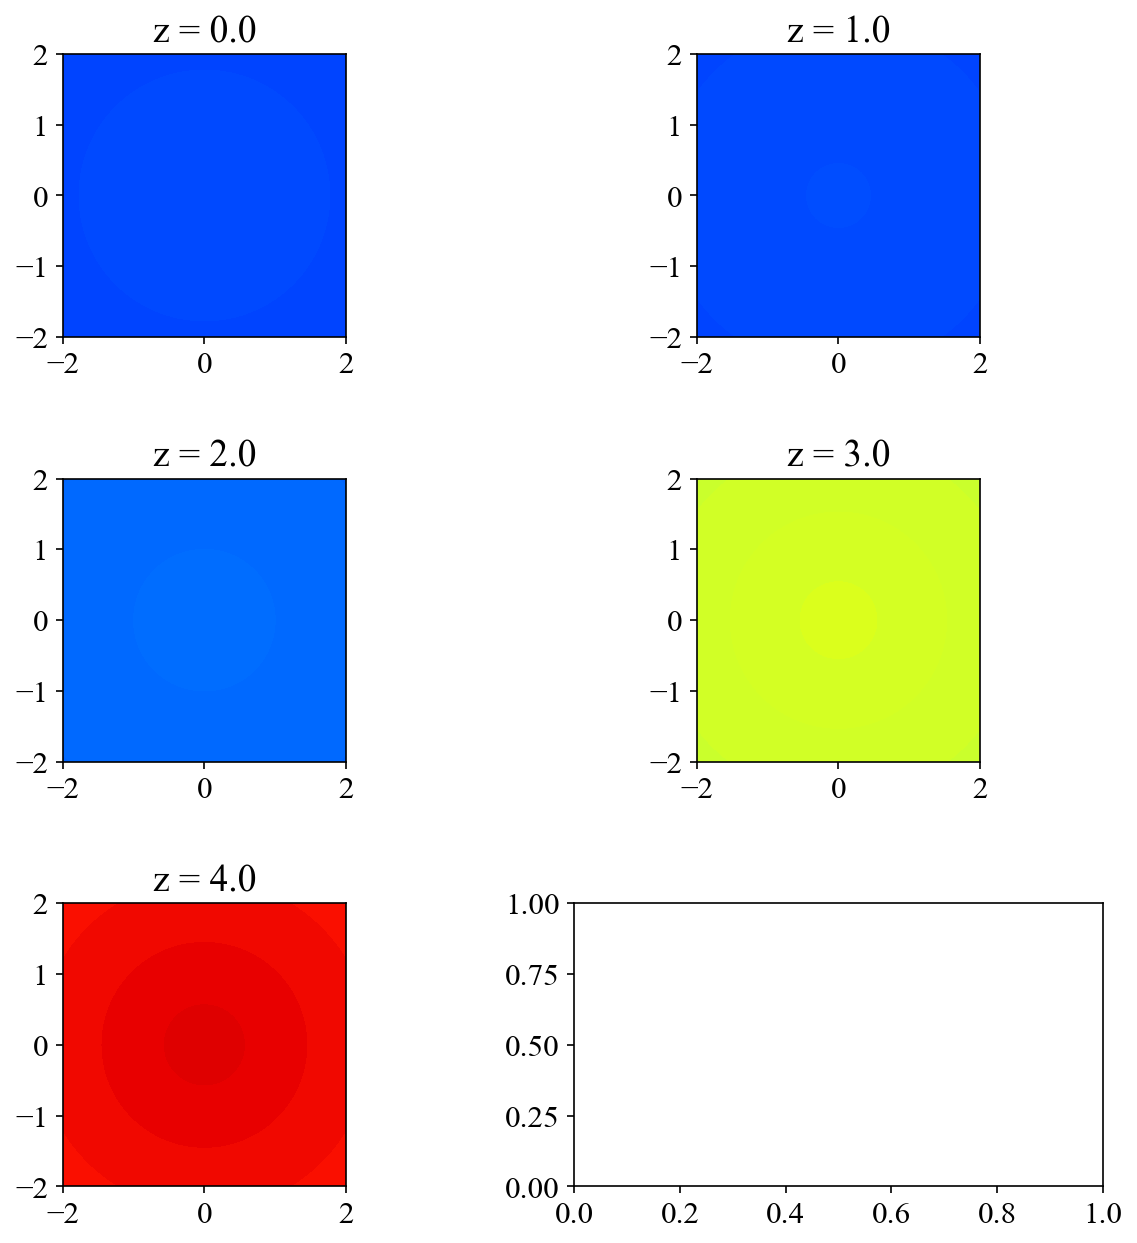

In [90]:
fig = plt.figure(facecolor="white", figsize=(10, 10))
axes = [fig.add_subplot(3, 2, i+1) for i in range(6)]
fig.subplots_adjust(wspace=0.2, hspace=0.5)

bbz = bb[2] # z成分
some_zs = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
for i, ax in enumerate(axes[:5]):
	bb_z_arg = np.squeeze(np.argwhere(z_unique == some_zs[i]))
	bbz_z = bbz[:, :, bb_z_arg]
	_xx = xx[:, :, bb_z_arg]
	_yy = yy[:, :, bb_z_arg]
	ax.set_aspect("equal")
	mappable = ax.contourf(_xx, _yy, bbz_z, vmax=5, vmin=0)
	ax.set_ylim([-2, 2])
	ax.set_xlim([-2, 2])
	ax.set_title("z = {z}".format(z=some_zs[i]))

## 復元できるかやってみる

磁力線を書きたい．まずx=0でスライス．そして，x=0, y=1での値と同じ磁束密度を持つ点を抽出

Text(0, 0.5, 'y')

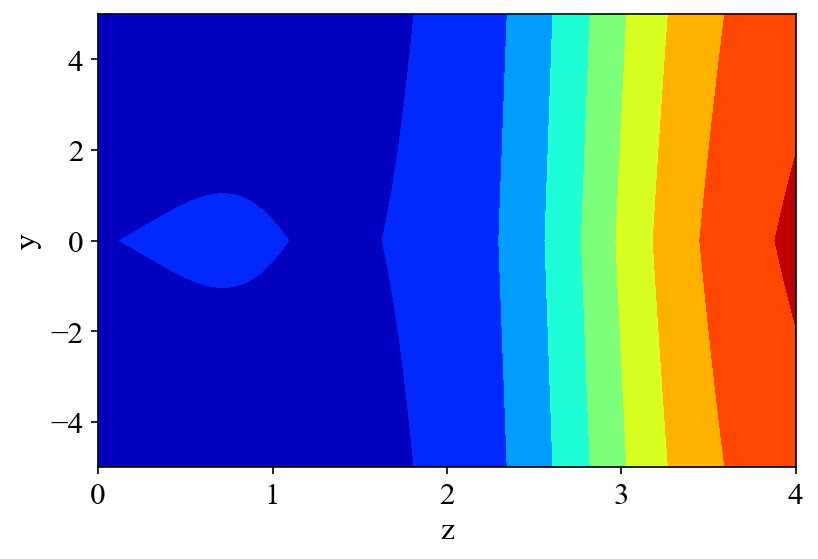

In [91]:
bbz = bb[2]  # z成分
x0 = 0.0
# bbz = bbz[xx == x0]
arg_x0 = np.squeeze(np.argwhere(x_unique == x0))
bbz[xx == 0].reshape((len(y_unique), len(z_unique)))
plt.contourf(
	zz[xx == 0].reshape((len(y_unique), len(z_unique))),
	yy[xx == 0].reshape((len(y_unique), len(z_unique))),
	bbz[xx == 0].reshape((len(y_unique), len(z_unique)))
)
plt.xlabel("z")
plt.ylabel("y")

Text(0, 0.5, 'y')

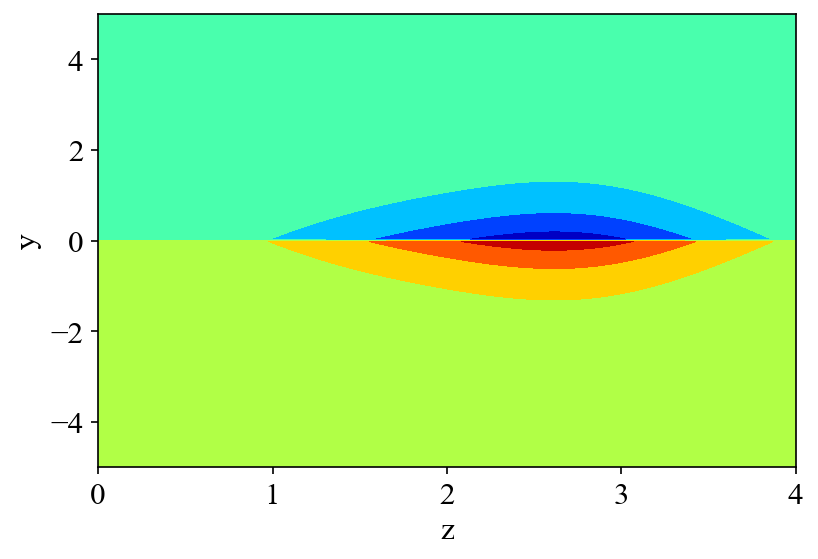

In [92]:
bby = bb[1]  # y成分
x0 = 0.0
# bbz = bbz[xx == x0]
arg_x0 = np.squeeze(np.argwhere(x_unique == x0))
bby[xx == 0].reshape((len(y_unique), len(z_unique)))
plt.contourf(
	zz[xx == 0].reshape((len(y_unique), len(z_unique))),
	yy[xx == 0].reshape((len(y_unique), len(z_unique))),
	bby[xx == 0].reshape((len(y_unique), len(z_unique)))
)
plt.xlabel("z")
plt.ylabel("y")

Text(0, 0.5, 'x')

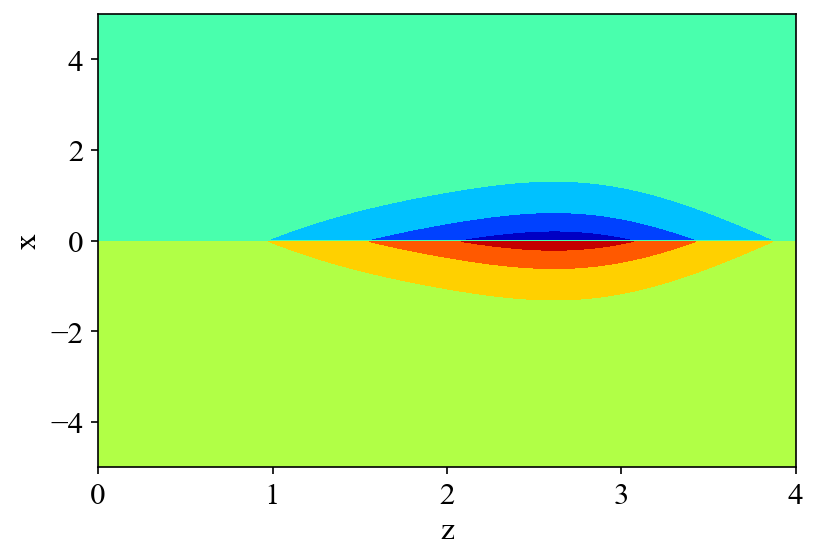

In [93]:
bbx = bb[0]  # x成分
y0 = 0.0
bbx[yy == 0].reshape((len(x_unique), len(z_unique)))
plt.contourf(
	zz[yy == 0].reshape((len(x_unique), len(z_unique))),
	xx[yy == 0].reshape((len(x_unique), len(z_unique))),
	bbx[yy == 0].reshape((len(x_unique), len(z_unique)))
)
plt.xlabel("z")
plt.ylabel("x")

## z軸に垂直な平面で運動している場合

In [94]:
init_position = np.array([1, 0, 1])
init_velocity = np.array([0, -0.1, 0.1])

rama_radius = MASS * 1 / (CHARGE * 1)
period = 2 * np.pi * rama_radius / 1
ts, positions = runge_kutta(f=eq_motion_RHS, t0=0, x0=init_position, v0=init_velocity, te=period*5, h=1e-3)

xs = positions[:, 0]
ys = positions[:, 1]
zs = positions[:, 2]

100%|██████████| 31416/31416 [00:14<00:00, 2209.79it/s]


(-2.0, 2.0)

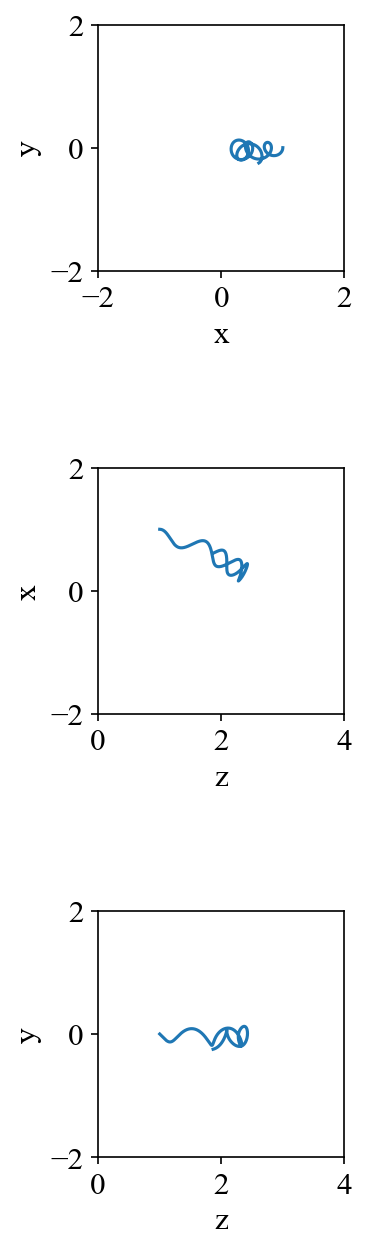

In [95]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.8)
for i, ax in enumerate(axes):
	ax.set_aspect("equal")

axes[0].plot(xs, ys)
axes[1].plot(zs, xs)
axes[2].plot(zs, ys)

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_xlim([-2, 2])
axes[0].set_ylim([-2, 2])
axes[1].set_xlabel("z")
axes[1].set_ylabel("x")
axes[1].set_xlim([0, 4])
axes[1].set_ylim([-2, 2])
axes[2].set_xlabel("z")
axes[2].set_ylabel("y")
axes[2].set_xlim([0, 4])
axes[2].set_ylim([-2, 2])